### Objective: Insights from the HR Analytics
- The goal of this project is to analyze the factors influencing job change decisions in employees. We will preprocess the data, encode categorical variables, perform exploratory data analysis (EDA), and derive insights about employee behavior.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.shape

(19158, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [8]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

### Missing Values

In [9]:
missing = df.isnull().sum()
percnt = (((df.isnull().sum())/len(df))*100)
x = pd.DataFrame({'Missing Values':missing,'Percentage Missing':percnt})
print(x)

                        Missing Values  Percentage Missing
enrollee_id                          0            0.000000
city                                 0            0.000000
city_development_index               0            0.000000
gender                            4508           23.530640
relevent_experience                  0            0.000000
enrolled_university                386            2.014824
education_level                    460            2.401086
major_discipline                  2813           14.683161
experience                          65            0.339284
company_size                      5938           30.994885
company_type                      6140           32.049274
last_new_job                       423            2.207955
training_hours                       0            0.000000
target                               0            0.000000


In [10]:
df.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

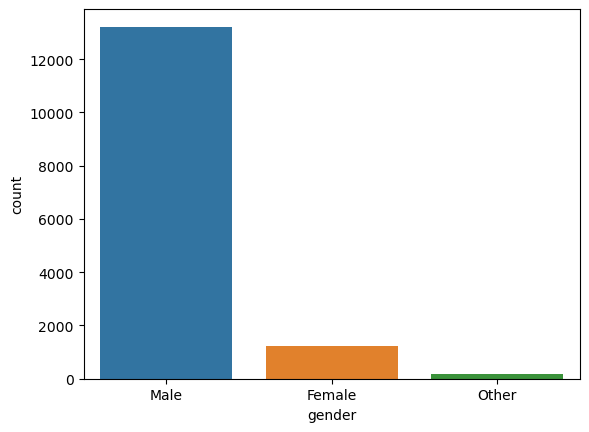

In [11]:
sns.countplot(x=df['gender'])

In [12]:
df['gender'].fillna('Unknown',inplace=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

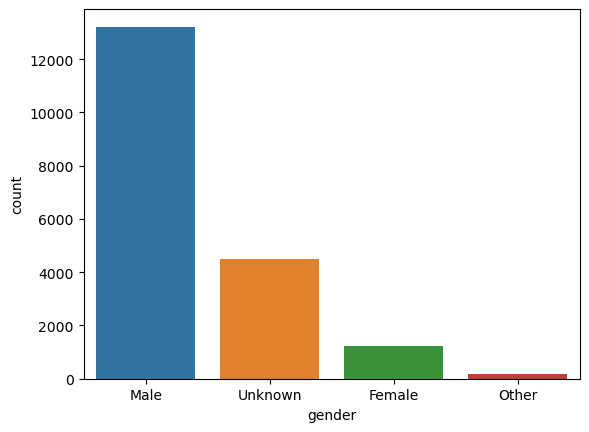

In [13]:
sns.countplot(x=df['gender'])

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

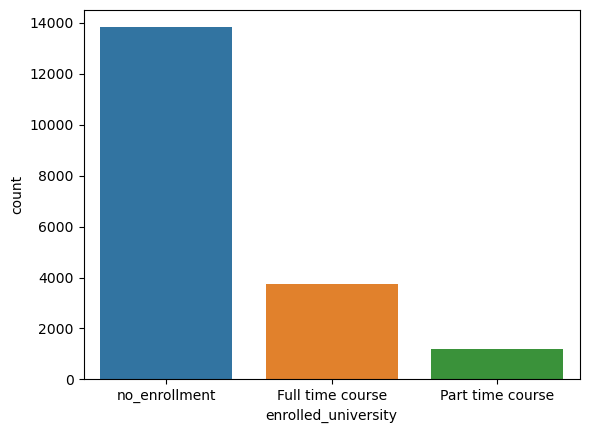

In [14]:
sns.countplot(x=df['enrolled_university'])

In [15]:
df['enrolled_university'].fillna(df['enrolled_university'].mode()[0],inplace=True)

<AxesSubplot:xlabel='education_level', ylabel='count'>

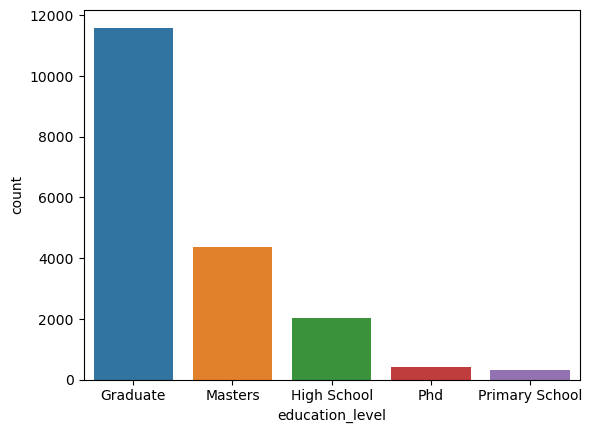

In [16]:
sns.countplot(x=df['education_level'])

In [17]:
df.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [18]:
df['education_level'].fillna(df['education_level'].mode()[0],inplace=True)

In [19]:
df.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

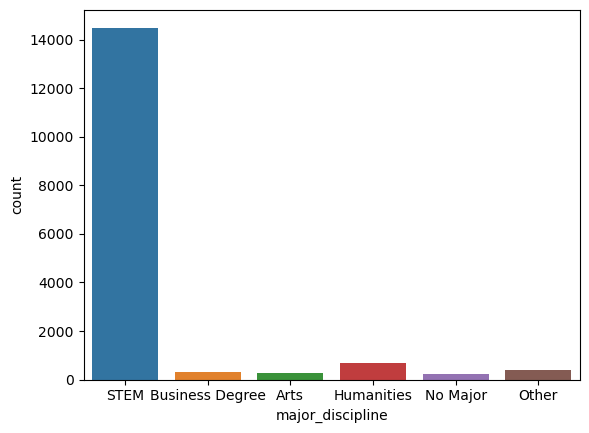

In [20]:
sns.countplot(x=df['major_discipline'])

In [21]:
df['major_discipline'].fillna('Unknown',inplace=True)

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='count'>

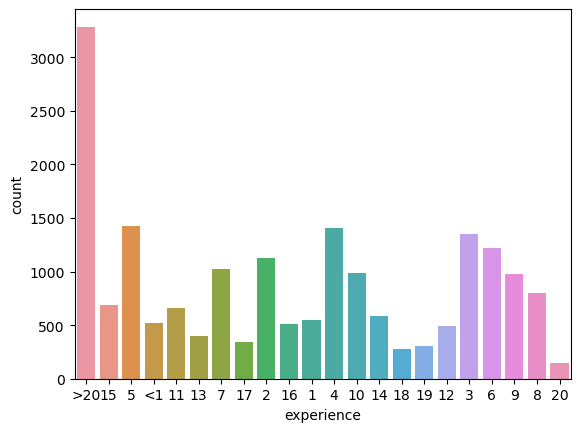

In [22]:
sns.countplot(df['experience'])

In [23]:
df['experience'].fillna(df['experience'].mode()[0],inplace=True)

In [24]:
df["company_size"].fillna("Unknown", inplace=True)
df["company_type"].fillna("Unknown", inplace=True)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

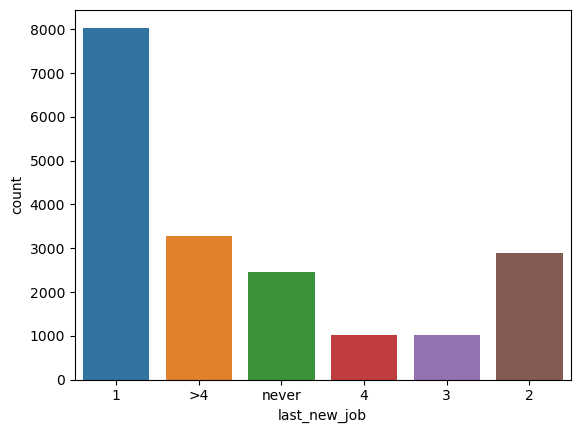

In [25]:
sns.countplot(x=df['last_new_job'])

In [26]:
df['last_new_job'].fillna(df['last_new_job'].mode()[0],inplace=True)

In [27]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Duplicated 

In [28]:
df.duplicated().sum()

0

### Outliers

In [29]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrollee_id'>

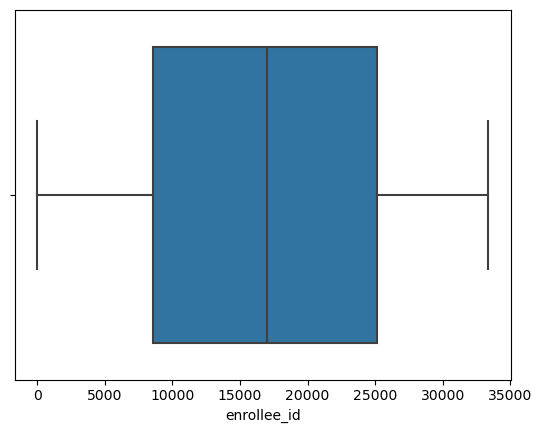

In [30]:
sns.boxplot(df['enrollee_id'])

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_development_index'>

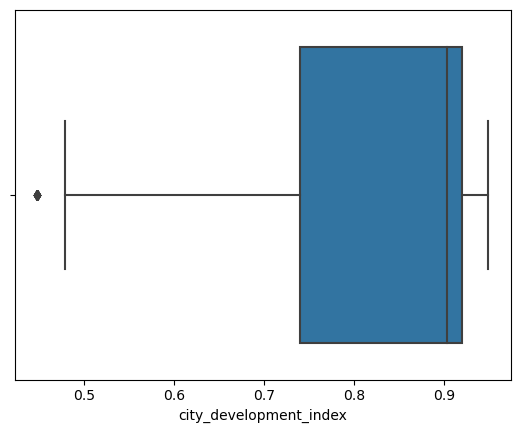

In [31]:
sns.boxplot(df['city_development_index'])

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

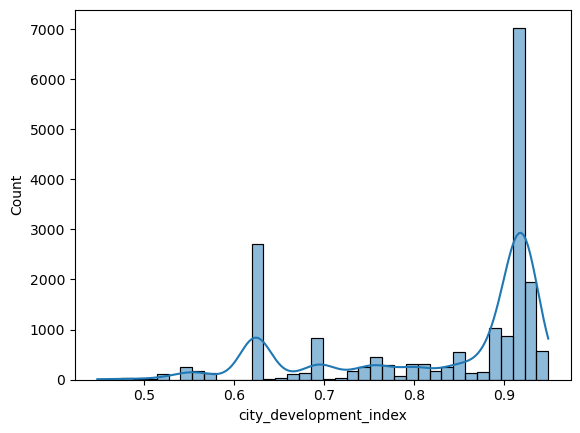

In [32]:
sns.histplot(df['city_development_index'],kde=True)

In [33]:
Q1 = df['city_development_index'].quantile(0.25)
Q3 = df['city_development_index'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df["city_development_index"] < lower_bound) | (df["city_development_index"] > upper_bound)]

# Display Outliers
outliers

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,8238,city_33,0.448,Unknown,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.0
4744,30985,city_33,0.448,Unknown,No relevent experience,Full time course,Graduate,STEM,2,Unknown,Unknown,never,43,1.0
5010,27970,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,Unknown,Unknown,never,73,1.0
5265,31194,city_33,0.448,Unknown,No relevent experience,no_enrollment,High School,Unknown,5,Unknown,Pvt Ltd,never,86,1.0
5567,598,city_33,0.448,Unknown,Has relevent experience,Part time course,Masters,STEM,6,Unknown,Unknown,1,18,1.0
6127,18564,city_33,0.448,Unknown,No relevent experience,Full time course,Graduate,STEM,4,Unknown,Public Sector,4,32,1.0
7724,31179,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.0
7864,26838,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,Unknown,Unknown,>4,74,0.0
9134,4858,city_33,0.448,Unknown,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.0
10401,19463,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.0


- CDI ranges between 0 and 1, even smaller values (like 0.3 or 0.4) might still be valid for underdeveloped cities. So, in this case, keeping 0.448 is a good decision.

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='training_hours'>

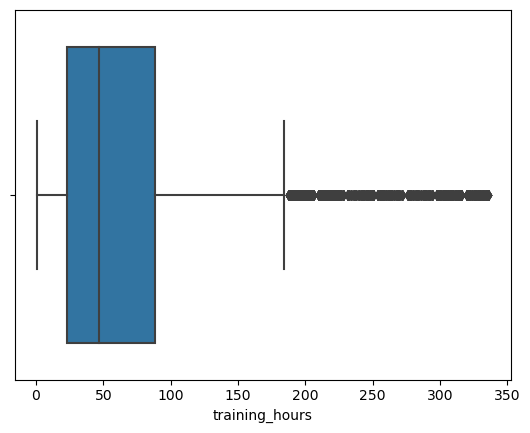

In [34]:
sns.boxplot(df['training_hours'])

In [35]:
df.training_hours.unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

- In HR analytics, some candidates might take short refresher courses (e.g., 5–20 hours), while others go for full professional training (e.g., 100+ hours).

<AxesSubplot:xlabel='target', ylabel='Count'>

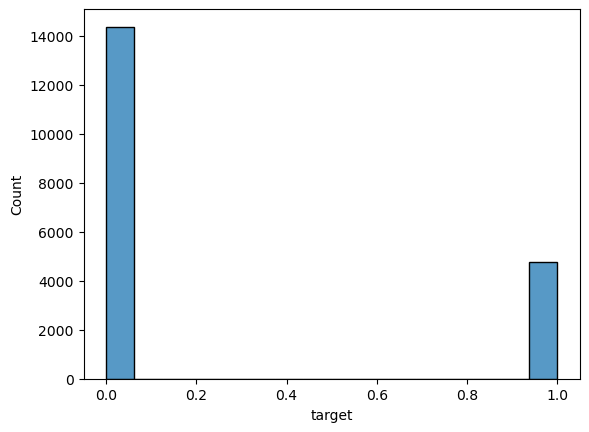

In [36]:
sns.histplot(df['target'])

### Encoding

In [37]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

In [38]:
df['education_level'].value_counts()

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [39]:
education_map = {
    'Graduate' : 0,
    'Masters': 1,
    'High School': 2,
    'Phd' : 3,
    'Primary School' : 3, 
}
df['education_level'] = df['education_level'].map(education_map)

In [40]:
df['company_type'].unique()

array(['Unknown', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Other', 'Public Sector', 'NGO'], dtype=object)

In [41]:
df = pd.get_dummies(df, columns=['company_type'], dtype=int)

In [42]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown
0,8949,city_103,0.920,0.0,Has relevent experience,no_enrollment,0,STEM,>20,Unknown,1,36,1.0,0,0,0,0,0,0,1
1,29725,city_40,0.776,0.0,No relevent experience,no_enrollment,0,STEM,15,50-99,>4,47,0.0,0,0,0,0,0,1,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,0,STEM,5,Unknown,never,83,0.0,0,0,0,0,0,0,1
3,33241,city_115,0.789,NaN,No relevent experience,no_enrollment,0,Business Degree,<1,Unknown,never,52,1.0,0,0,0,0,0,1,0
4,666,city_162,0.767,0.0,Has relevent experience,no_enrollment,1,STEM,>20,50-99,4,8,0.0,0,1,0,0,0,0,0


In [43]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

- Assuming >20 is 21 and <1 is 0

In [44]:
df['experience'] = df['experience'].replace({'>20': 21, '<1': 0})

In [45]:
df['experience'] = df['experience'].astype(int)

In [47]:
df.dtypes

enrollee_id                           int64
city                                 object
city_development_index              float64
gender                              float64
relevent_experience                  object
enrolled_university                  object
education_level                       int64
major_discipline                     object
experience                            int32
company_size                         object
last_new_job                         object
training_hours                        int64
target                              float64
company_type_Early Stage Startup      int32
company_type_Funded Startup           int32
company_type_NGO                      int32
company_type_Other                    int32
company_type_Public Sector            int32
company_type_Pvt Ltd                  int32
company_type_Unknown                  int32
dtype: object

### EDA

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

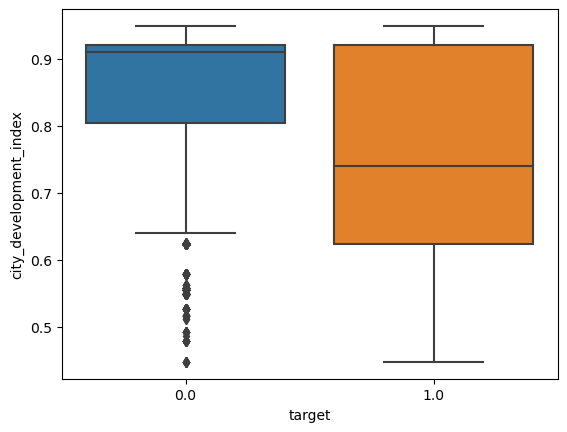

In [48]:
sns.boxplot(x='target',y='city_development_index',data=df)

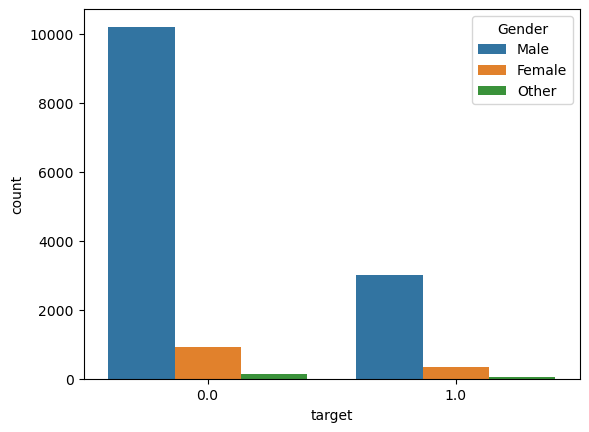

In [52]:
sns.countplot(x='target',hue='gender',data=df)
plt.legend(title='Gender', labels=['Male', 'Female', 'Other'])
plt.show()

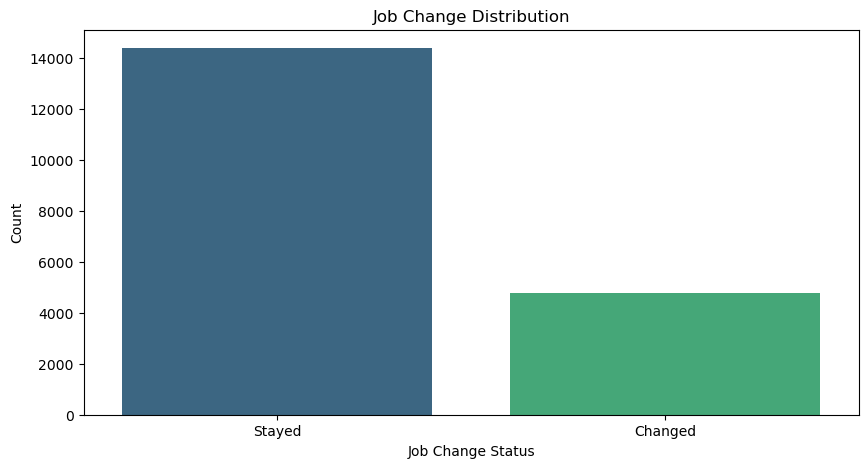

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='target', data=df, palette='viridis')
plt.xticks(ticks=[0,1], labels=['Stayed','Changed'])
plt.title('Job Change Distribution')
plt.xlabel('Job Change Status')
plt.ylabel('Count')
plt.show()

#### Job Change Based on Last New Job
- Are employees who recently switched jobs more likely to leave again?

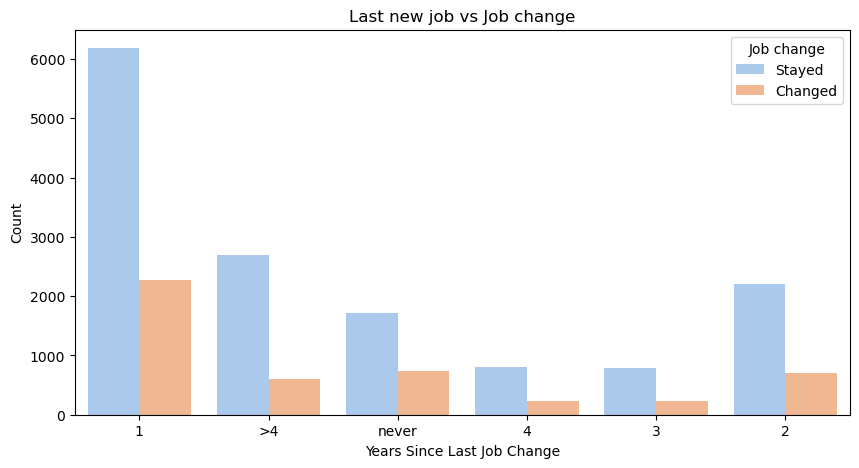

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='last_new_job', data=df, hue='target', palette='pastel')
plt.title('Last new job vs Job change')
plt.xlabel('Years Since Last Job Change')
plt.ylabel('Count')
plt.legend(title='Job change', labels=['Stayed','Changed'])
plt.show()

#### Job Change Based on Experience
Are employees who are less experienced more likely to leave job?

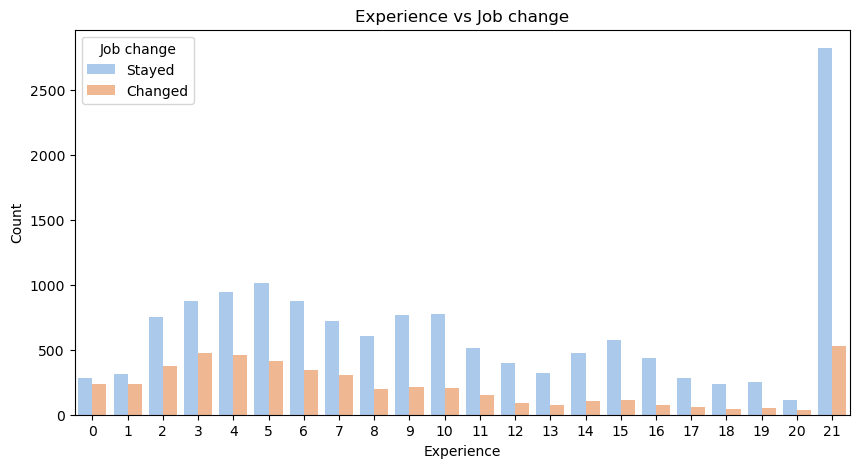

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='experience', data=df, hue='target', palette='pastel')
plt.title('Experience vs Job change')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.legend(title='Job change', labels=['Stayed','Changed'])
plt.show()

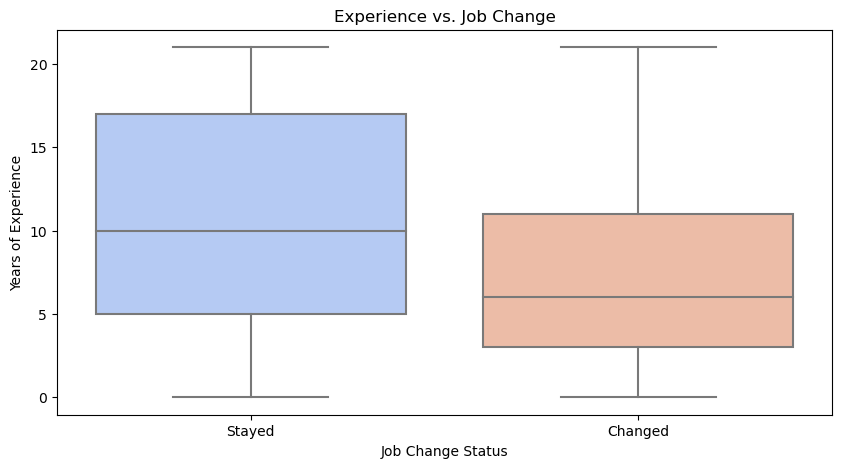

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target', y='experience', data=df, palette='coolwarm')
plt.xticks(ticks=[0,1], labels=['Stayed', 'Changed'])
plt.title('Experience vs. Job Change')
plt.xlabel('Job Change Status')
plt.ylabel('Years of Experience')
plt.show()

#### Job Change Based on Training Hours

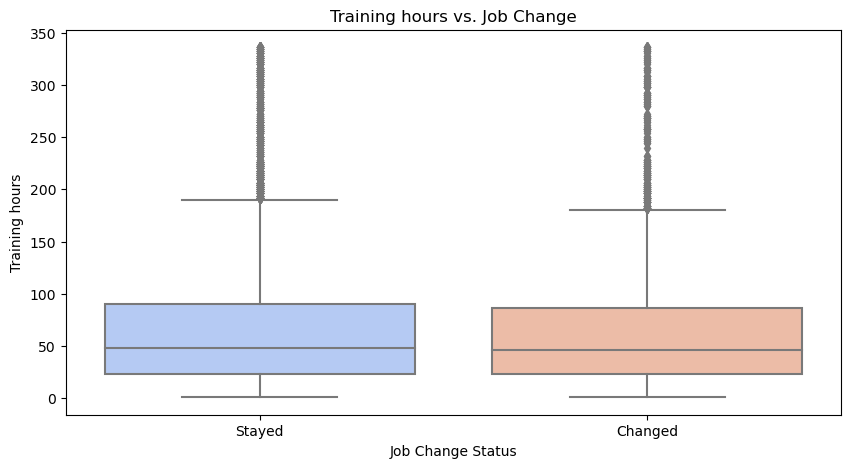

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target', y='training_hours', data=df, palette='coolwarm')
plt.xticks(ticks=[0,1], labels=['Stayed', 'Changed'])
plt.title('Training hours vs. Job Change')
plt.xlabel('Job Change Status')
plt.ylabel('Training hours')
plt.show()

### Insights:

1️⃣ Job Change Distribution
- Barplot: Show the proportion of employees who changed jobs (Target = 1) vs. those who stayed (Target = 0).
- **Insight**: Understand the general job change trend in the dataset.
    
2️⃣ Job Change vs. Gender
- Barplot (hue = gender): Compare Target distribution across different genders.
- **Insight**: Identify whether male, female, or other employees are more likely to switch jobs.
    
3️⃣ Job Change Based on Last New Job
- Barplot: Analyze how long ago employees last changed jobs (last_new_job) and its impact on Target.
- **Expectation**: Employees with longer gaps may be less likely to change jobs again.
    
4️⃣ Job Change Based on Experience
- Boxplot/Bar Plot: Compare experience distribution for those who changed jobs vs. those who didn’t.
- **Insight**: Employees with less experience may switch jobs more frequently.
    
5️⃣ Job Change Based on Training Hours
- Boxplot/: Analyze whether employees with more training hours are less likely to leave.
- **Expectation**: Higher training hours may correlate with higher job retention.